# 数值稳定性和模型初始化
初始化方案的选择在神经网络学习中有很大的作用，它对保持数值稳定性至关重要。此外，这些初始化方案的选择可以与非线性激活函数的选择有趣的结合在一起。 我们选择哪个函数以及如何初始化参数可以决定优化算法收敛的速度有多快。 

相反，糟糕的选择会使我们在训练的时候遇到梯度爆炸或者梯度消失的现象

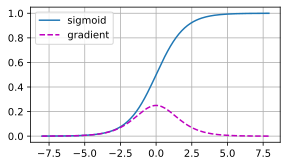

In [1]:
# 梯度消失
# sigmoid函数为什么导致梯度消失
import torch as t
import sys
%matplotlib inline
sys.path.append("../")
from pltutils import *
x=t.arange(-8.,8.,0.1,requires_grad=True)
y=t.sigmoid(x)
y.backward(t.ones_like(x))

plot(x.detach().numpy(),[y.detach().numpy(),x.grad.numpy()],legend=["sigmoid","gradient"],figsize=(4.5,2.5))

可以看到，在输入很大或者很小的时候，它的梯度都很小，除非刚刚好在中间，反向传播通过很多层的时候，整个乘积的梯度可能就会消失。所以ReLU系列函数成为现在神经网络的默认选择。

In [4]:
# 梯度爆炸
Matrix=t.normal(0,1**2,size=(4,4))
print(f"Matrix is {Matrix}")
print("-----------------------------------------------")
for _ in range(100):
    Matrix = t.mm(Matrix, t.normal(0, 1**2, size=(4, 4)))
print(f'Mathrix is {Matrix}')


Matrix is tensor([[-0.2691,  0.2605,  1.4257, -0.1832],
        [-0.4109, -1.7511, -1.7666, -0.7365],
        [ 0.5130,  0.1116, -1.2145, -0.6280],
        [ 0.2985,  1.1992,  0.4321, -0.3199]])
-----------------------------------------------
Mathrix is tensor([[ 5.6799e+22, -6.3210e+21, -1.8741e+22,  8.5914e+21],
        [ 5.5617e+21, -6.1912e+20, -1.8351e+21,  8.4103e+20],
        [-1.6504e+23,  1.8367e+22,  5.4456e+22, -2.4963e+22],
        [-1.4600e+23,  1.6249e+22,  4.8175e+22, -2.2084e+22]])


梯度爆炸是由于初始化网络的时候导致的，我们没有机会让梯度下降优化器收敛了。

---

参数初始化是解决上述问题的一种方法，优化期间的注意和适当的正则化可以进一步提高稳定性

如果不指定初始化方法，框架将使用默认的随机初始化方法，对于中等难度的问题很有效
